In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datetime import datetime

import pyprind
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import seaborn as sns
from sklearn.cluster import k_means
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import california_housing
from numpy.random import randint

sns.set(context='notebook', style='whitegrid', font_scale=2)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/fwilhelm/.virtualenvs/venv3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import sklearn
import tensorflow as tf
import pandas as pd

In [11]:
#df = pd.read_csv('./input/bike_rental_hour.csv', index_col='instant', parse_dates=['dteday']).reset_index(drop=True)

col_names = [x.split(':')[0] for x in open('input/cal_housing.domain').readlines()]
df = pd.read_csv('./input/cal_housing.data', names=col_names)
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


In [12]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


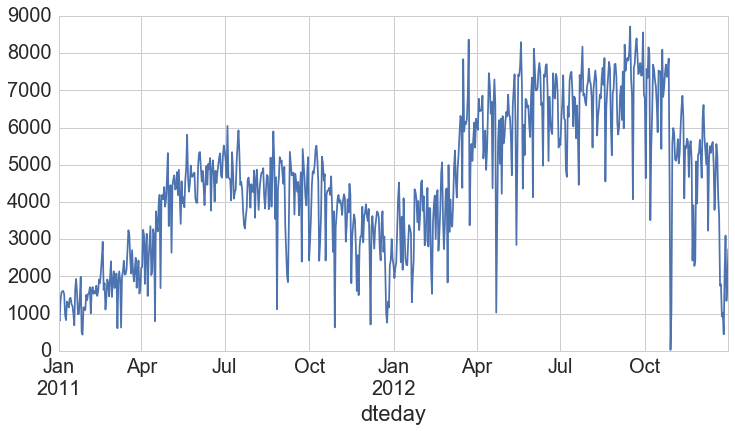

In [7]:
df.groupby(['dteday'])['cnt'].sum().plot()

In [8]:
df = df.drop(['casual', 'registered'], axis=1)
df_train = df[df.dteday <= datetime(2012, 9, 30)]
df_test = df[df.dteday >= datetime(2012, 9, 30)]

for x in (df_train, df_test):
    x.loc[:, 'dteday'] =1# x.dteday.map(lambda x: x.value)
    
X_train = df_train.drop('cnt', axis=1).values
y_train = df_train.cnt.values[:, np.newaxis]
X_test = df_test.drop('cnt', axis=1).values
y_test = df_test.cnt.values[:, np.newaxis]

/home/fwilhelm/.virtualenvs/venv3/lib/python3.4/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


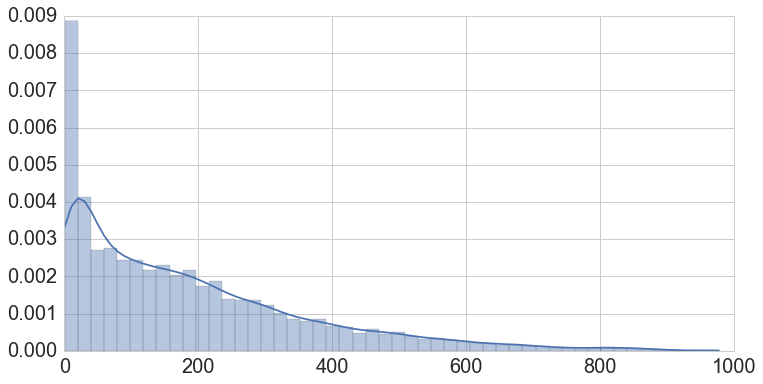

In [13]:
sns.distplot(y_train)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
k_means(X_train, 8)[0]

array([[  0.00000000e+00,   3.21849407e-01,   2.31393882e-01,
          2.89613203e-01,  -1.03277550e+00,  -1.65389768e-01,
          3.02050885e-01,   3.09621614e-01,  -2.54303988e-01,
          5.28674310e-01,   5.28036836e-01,   6.26950352e-01,
         -5.26931734e-01],
       [  0.00000000e+00,  -1.19049578e+00,  -3.42055028e-02,
         -1.22856975e+00,  -4.15029040e-01,  -1.65389768e-01,
         -8.47578757e-02,   1.59819258e-02,  -1.85152919e-01,
         -1.37288749e+00,  -1.35265328e+00,  -1.20359770e-01,
         -3.26750420e-01],
       [  0.00000000e+00,  -5.46207078e-01,   8.73808705e-02,
         -5.51622805e-01,  -4.82336563e-02,  -1.65389768e-01,
          1.44147314e-01,   1.02774473e-01,   1.72243742e+00,
         -3.41036732e-01,  -3.39166843e-01,   1.07453738e+00,
          1.47715477e-01],
       [  0.00000000e+00,   3.61379980e-01,   9.07136546e-02,
          3.24226230e-01,   6.75959582e-02,  -1.65389768e-01,
         -1.49741078e+00,  -1.47385982e+00,  -2.382

In [65]:
class ANN(object):
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self._graph = tf.Graph()
        self.session = None
        self._initialized = False

    def get_model(self, n_features, means):
        with tf.name_scope('input'):
            self._x = tf.placeholder("float", shape=[None, n_features], name='X')
        with tf.name_scope('hidden'):
            c = [tf.Variable(tf.constant(means[i,:].astype(np.float32), shape=[1, n_features]), name='c')
                 for i in range(self.n_hidden)]
            beta = [tf.Variable([0.05], name="beta")
                    for i in range(self.n_hidden)]
            h = [tf.exp(-beta[i]*tf.reduce_sum(tf.square(tf.sub(self._x, c[i])), 1, keep_dims=True)) 
                 for i in range(self.n_hidden)]
        with tf.name_scope('output'):
            self._a = tf.Variable(tf.truncated_normal([self.n_hidden, 1], stddev=0.01), name='A')
            y = tf.matmul(tf.concat(1, h), self._a)
        return y

    def add_cost(self, yhat):
        self._y = tf.placeholder("float", shape=[None, 1], name='Y')
        loss = tf.nn.l2_loss(tf.sub(self._y, yhat))
        return loss

    def _init(self, n_features, means):
        with self._graph.as_default():
            self._model = self.get_model(n_features, means)
            self._costfunc = self.add_cost(self._model)
            self._train_step = tf.train.GradientDescentOptimizer(0.001).minimize(
                self._costfunc, var_list=[self._a])
            #self.summaries = tf.merge_all_summaries()
            self.session = tf.Session(graph=self._graph)
            self.session.run(tf.initialize_all_variables())
            self._writer = tf.train.SummaryWriter("./logs", self.session.graph_def)
            #self.saver = tf.train.Saver()
            self._initialized = True
        
    def _fit(self, X, y, steps=50, batch=200):
        n_samples = X.shape[0]

        for step in xrange(steps):
            batch_indices = randint(n_samples, size=self.batch)
            pbar.update()
            x = X[batch_indices]
            y_ = y[batch_indices]
            if run % 1000 == 0:
               result, cost = self.session.run([self.summaries, self._costfunc], feed_dict={self._x: x, self._y_: y_})
               #print("Cost: {}".format(cost))
               self.writer.add_summary(result, run)
            else:
                self.session.run([self._train_step], feed_dict={self._x: x, self._y_: y_})
    
    def get_variables(self):
        with self._graph.as_default():
            return {var.name: var for var in tf.all_variables()}
                
    def fit(self, X, y, steps=50, batch=200):
        n_samples, n_features = X.shape

        if not self._initialized:
            means = k_means(X, self.n_hidden)[0]
            self._init(n_features, means)

        pbar = pyprind.ProgBar(steps)
        for step in range(steps):
            batch_indices = randint(n_samples, size=batch)
            self.session.run(self._train_step, feed_dict={self._x: X[batch_indices],
                                                          self._y: y[batch_indices]})
            pbar.update()
        return self

    def predict(self, X):
        return self.session.run(self._model, feed_dict={self._x: X})

In [66]:
ann = ANN(8)
ann.fit(X_train, y_train, steps=10000, batch=500)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:09


In [67]:
preds = ann.predict(X_train)

In [68]:
preds

array([[ -30.17590332],
       [ -31.2800293 ],
       [ -28.47708893],
       ..., 
       [ 163.60427856],
       [ 151.55480957],
       [ 174.28048706]], dtype=float32)

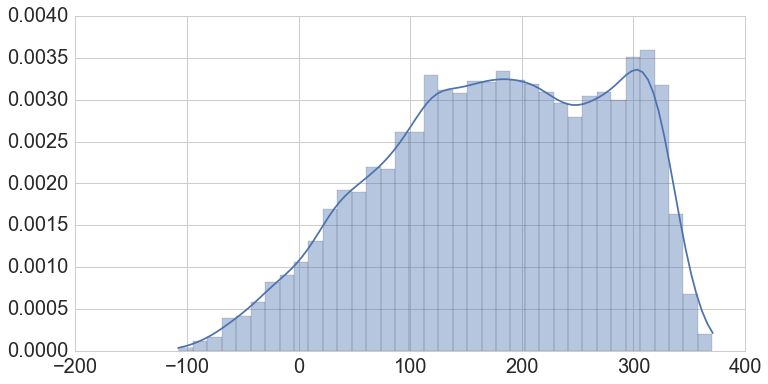

In [69]:
sns.distplot(preds)

In [ ]:
_ = plt.hist(preds)